# A. Parte I: Comprension del problema de ML

# 1) 
Describa de manera clara el problema de predicción que esta abordando, su campo de aplicación y explique si corresponde a un problema de clasificacion o de regresion.

# 2)
Enumere las variables incluidas como entrada al sistema
y la o las variables a predecir. Explique claramente el
tipo de codificacion de cada variable y, si la base de  ́
datos cuenta con valores faltantes, explique como se  ́
llenaron los vac ́ıos en cada caso.

In [58]:
import pandas as pd
import numpy as np

In [73]:
db=pd.read_csv('Database/DataOriginal.csv',header=1)

In [74]:
db=db.rename(columns={'default payment next month': 'DEF_PAY', 
                        'PAY_0': 'PAY_1'})

In [75]:
db.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Variables de entrada

In [76]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

## Variable de salida

## Valores faltantes o no documentados

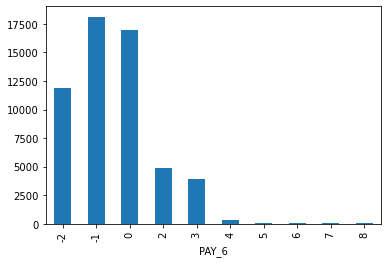

In [84]:
categorical_columns=['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','DEF_PAY']
for col in categorical_columns:
#     print(db.groupby(col)['ID'].nunique())
    db.groupby(col)['ID'].count().plot(kind='bar')

In [64]:
db=db.drop('ID',axis=1)
db.loc[((db.EDUCATION == 5) | (db.EDUCATION == 6) | (db.EDUCATION == 0)),'EDUCATION']=4

for col in ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6',]:
    db[col]=np.where(db[col] == -2, 0, db[col])
    db[col]=np.where(db[col] == -1, 0, db[col])


In [67]:
db.sample(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY
10240,20000,1,3,2,28,0,2,2,2,0,...,4845,6753,9615,1000,1000,0,2000,3000,2000,1
25854,130000,2,1,2,30,0,0,0,0,0,...,5457,3855,4684,2437,2774,5457,3855,4684,843,0
9226,280000,2,2,1,40,0,0,0,0,0,...,565,830,415,415,415,565,830,0,415,0
29803,90000,1,2,2,32,0,0,0,0,0,...,0,0,0,7000,0,0,0,0,0,0
6428,130000,2,2,2,25,2,2,0,0,0,...,95956,97770,92206,0,18259,3456,3770,3706,3708,1


<AxesSubplot:xlabel='EDUCATION'>

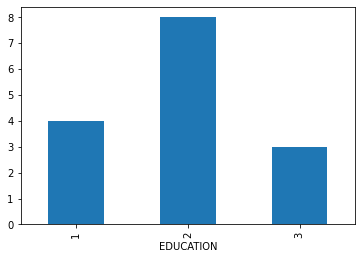

In [82]:
db.head(15).groupby('EDUCATION')['ID'].count().plot(kind='bar')